<a href="https://colab.research.google.com/github/osmanhamdibaki/natural_language_processing/blob/main/DO%C4%9EAL_D%C4%B0L_%C4%B0%C5%9ELEME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################################
# NATURAL LANGUAGE PPOCESSING - DOĞAL DİL İŞLEME
##############################################



In [ ]:
##########################################################
# SENTIMENT ANALYSIS AND SENTIMENT MODELING FOR AMAZON REVİEWS
###########################################################

# Uçtan uca şu adımları uygulayacağız

#1 - Text Preprocessing
#2 - Text Visualization
#3 - Sentiment Analysis
#4 - Feature Engineering
#5 - Sentiment Modeling


# !pip install nltk
# !pip install textblob
# !pip install wordcloud

In [ ]:
######################################################
# KÜTÜPHANELERİN KURULMASI
######################################################

!pip install nltk
!pip install textblob
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# İLGİLİ KÜTÜPHANELERİN YÜKLENMESİ

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

# warninglerin önüne geçmek için
filterwarnings('ignore')
# bütün sütunları göster
pd.set_option('display.max_columns', None)
# maksimum genişlik
pd.set_option('display.width', 200)
# virgülten sonra iki basamak göster
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
##################################################
# 1. Text Preprocessing
##################################################

In [ ]:
# veri setimizi yüklüyoruz.
# ayraç bilgisini virgül ile ver - bunu yapmayabilirdik de no problem
df = pd.read_csv("/content/amazon_reviews.csv", sep = ",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
# veri setinin açıklanması

# reviewerID yorum yapanlar
# asin	ürünü ifade eder
# reviewerName	yorum yapan isimleri
# helpful	faydalı mı değil mi
# reviewText	yorumlar
# overall	puan
# summary	özet
# unixReviewTime
# reviewTime
# day_diff
# helpful_yes
# total_vote

In [ ]:
###############################
# Normalizing Case Folding
###############################
# büyük küçük harf dönüşümü denir

# burada reviewText üzerinde bir işlem yapacağız
# o yüzden bu değişkenimize bir göz atalım

df["reviewText"]

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
# reviewText değişkenini incelediğimizde;
# bazı harfler büyük  bazıları küçük bunları tek şekle getireceğiz
df["reviewText"] = df["reviewText"].str.lower()
df["reviewText"]

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
###############################
# Punctuations - Noktalama işaretleri
###############################

# hedefimiz ölçüm değeri taşımayan faktörleri düzetltmek olduğundan
# noktalama işaretlerini çıkarıyotuz
# unutmamak lazım ki bu projeden projeye değişebilir.

# noktalama işaretlerini bul ve boşluk ile değiştir
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')
df["reviewText"]

# regular expression

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
###############################
# Numbers
###############################
# burada sayıları çıkaracağız

df['reviewText'] = df['reviewText'].str.replace('\d', '')
df["reviewText"]

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
###############################
# Stopwords
###############################

# burada bağlac edat vs ne varsa çıkaracağız.

import nltk
nltk.download('stopwords')

sw = stopwords.words('english')

# apply fonksiyonunu açıklayalım
# ifadeyi stringe çevir ve her kelimeyi boşlukla ayır böylece kelimeler belirgin olacak
# daha sonra kelimelerde dolaş, eğer kelime stopwords değilse reviewtext olarak al
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["reviewText"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
###############################
# Rarewords
###############################

# nadir kelimeler anlamına gelir
# burada metinde nadir geçen ifadeleri çıkaracağız

# review texti kelime kelime ayır, ve her kelimeyi say
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

# eğer bir veya daha azsa bunu dropsa ekle
drops = temp_df[temp_df <= 1]

# reviewtexte dolaş, kelime dropsta yoksa değişkende kalsın
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df["reviewText"]

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
###############################
# Tokenization
###############################
# cümleleri tokenlerine ayırmak, cümleleri parçalamak anlamına gelir


nltk.download("punkt")

# textview içinde gez kelime kelime parçalarına ayır
# cümleler liste şeklinde olur ve kelimeler arasında boşluk olur
# textblob yöntemi de denir


df["reviewText"].apply(lambda x: TextBlob(x).words).head()
df["reviewText"]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
###############################
# Lemmatization
###############################

# kelimeleri köklerine ayırma işlemidir

# kodun açıklanması

# df['reviewText']: Bu ifade, "df" adlı DataFrame içerisindeki "reviewText" sütununu seçer.
# .apply(lambda x: ...): Bu ifade, "reviewText" sütunundaki her bir değere (metne) uygulanacak bir işlev tanımlar. Yani, DataFrame'in her bir satırı üzerinde bu işlev çalıştırılır.
# " ".join([...]): Bu ifade, bir liste içerisindeki öğeleri birleştirerek tek bir metin haline getirir. Liste, metni boşluklarla bölünmüş ayrı kelimelere ayıran x.split() ifadesiyle oluşturulur.
# [Word(word).lemmatize() for word in x.split()]: Bu ifade, metindeki her bir kelimenin kökünü bulmak için bir dizi işlem gerçekleştirir. İlk olarak, x.split() ifadesi metni kelimelere böler ve bu kelimeleri bir liste halinde döndürür. Ardından, liste içerisindeki her bir kelimeye Word(word).lemmatize() işlemi uygulanır. Burada, her bir kelimeyi Word sınıfı kullanarak köklerine dönüştürmek için bir lemmatize işlemi gerçekleştirilir.

nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["reviewText"]

[nltk_data] Downloading package wordnet to /root/nltk_data...


0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
##################################################
# 2. Text Visualization
##################################################

In [ ]:
###############################
# Terim Frekanslarının Hesaplanması
###############################

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)


# kodun açıklanması

# df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))): Bu ifade, "reviewText" sütunundaki her bir metni alır ve bu metinleri boşluklara göre böler. Ardından, her bir metindeki kelimenin frekansını hesaplamak için pd.value_counts() fonksiyonunu uygular. Bu işlem sonucunda her bir metin için bir frekans tablosu (seri) elde edilir.
# .sum(axis=0): Bu ifade, frekans tablolarını toplar ve sütun bazında (axis=0) toplam frekansı hesaplar. Bu, tüm metinlerdeki kelimelerin toplam frekansını içeren bir seri oluşturur.
# .reset_index(): Bu ifade, oluşturulan seriye bir indeks ekler. İndeks, kelimeleri temsil eden "index" sütunu olarak adlandırılır ve frekans değerlerini içeren "0" sütunu olarak adlandırılır
# tf.columns = ["words", "tf"]: Bu ifade, frekans tablosunun sütun adlarını "words" ve "tf" olarak değiştirir. "words" sütunu, kelimeleri içeren sütunu temsil ederken, "tf" sütunu, term frekansını (kelimenin metindeki frekansını) temsil eder.
# tf.sort_values("tf", ascending=False): Bu ifade, term frekansına göre frekans tablosunu azalan şekilde sıralar. Yani, en yüksek frekansa sahip kelimeler en üstte olacak şekilde bir sıralama yapılır.









,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2721,sizethe,2.00
2719,everybody,2.00
2717,lived,2.00
3687,chkdsk,2.00


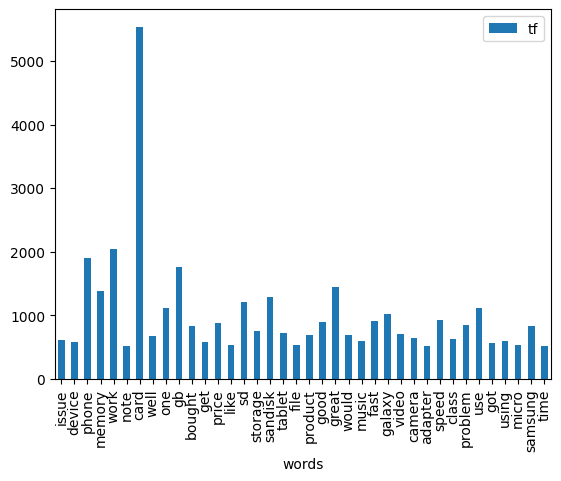

In [ ]:
###############################
# Barplot
###############################

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

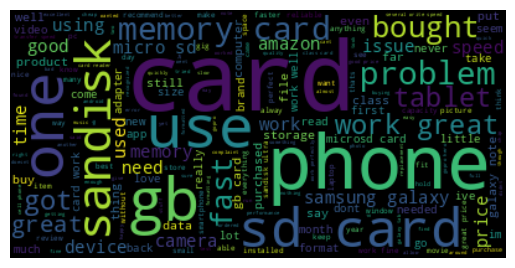

In [ ]:
###############################
# Wordcloud
###############################
# değişken içindeki bütün satırları tek bir cümle haline getir
text = " ".join(i for i in df.reviewText)

# text dosyasından wordcloud oluştur
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

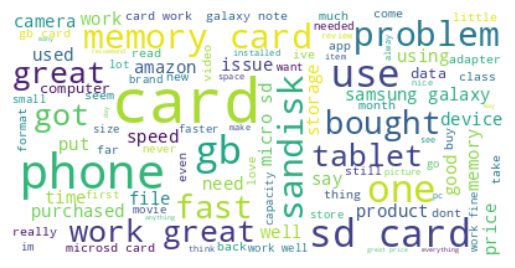

In [ ]:
# maksimim font size 50
# bulutta olacak max kelime 100
# arka fon rengi beyaz

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

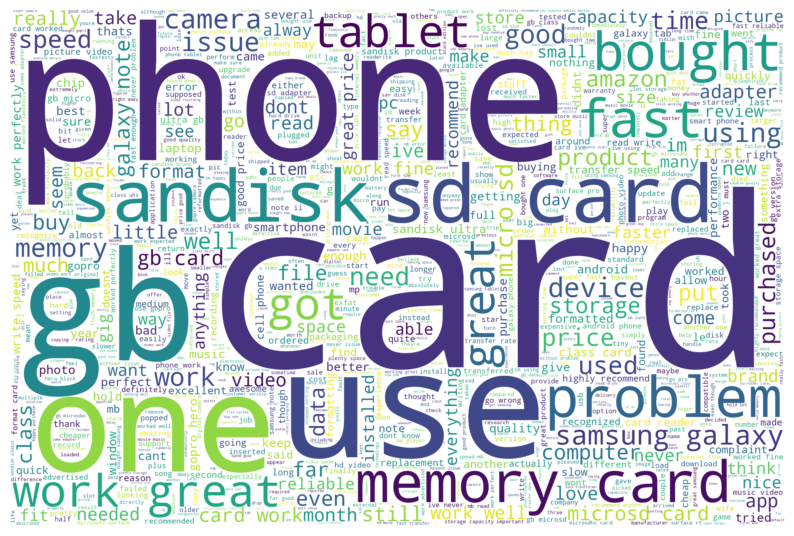

In [ ]:
###############################
# Şablonlara Göre Wordcloud
###############################

# arka fon için png dosyası indirdik intten herhangi bi png olur
tr_mask = np.array(Image.open("/content/tr.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
##################################################
# 3. Sentiment Analysis
##################################################

# burada duygu durum analizi yapacağız
# metindeki her kelimenin taşıdığı pozitif negatif ya da nötr anlamlar var
# değerlendirmeler sonucunda metin pozitif anlamlı mı yoksa negatif mi değerlendireceğiz.

# üzerinde duracağımız değişkeni çağırıyoruz
df["reviewText"].head()
# incelediğimizde never kelimesi negatif bunu anlayabiliyoruz(örnek)

# bunu indirmemiz gerekiyor
nltk.download('vader_lexicon')

# kullanacağımız metodu getiriyoruz
sia = SentimentIntensityAnalyzer()
# bu örnek cümlenin polariti skoruna bakıyoruz. Pozitif mi negatif mi anlamında
sia.polarity_scores("The film was awesome")
# negatif skoru 0, nötr skoru 0,423 , pozitif scoru 0,577 compound scoru 0.6249 görünüyor
# burada odaklanacağız compound kısmıdır.
# compound -1 ile +1 arasında değer alır.
# yani compound 0'dan büyükse ilgili cümle pozitiftir deriz.
# 0'dan küçükse negatiftir deriz.



# yeni bir cümle örneği girelim
sia.polarity_scores("I liked this music but it is not good as the other one")
# compound değerine baktığımızda -0.298 görünüyor. yani bu negatiftir diye yorumlarız.

# değişkenimizden 10 tane satır seçelim ve bunların polariti skorlarına bakalım.
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

# compoundu seçerek skorlarına bakalım
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])
# böylecee veri setimiz içindeki satırlara gittik ve duygu durum skorlarına baktık ve analizini yaptık

# polariti skor diyerek değişken oluşturduk ve reviewtextin duygu skorlarını kullandık.
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
###############################
# 4. Feature Engineering
###############################

# polariti skorlarını sınıfa ayıracağız
# 0'dan büyükleri pozitif, küçükleri negatif değerlendireceğiz
# yani bunun için kategorik bir değişken olşturmuş olacağız polariti skor üzerinden

# 0'dan büyükler pozitif, küçükler negatif diye uyguladık
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

# bunu bir değişkene atadık
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

# kaç tane pozitif kaç tane negatif var diye baktık
df["sentiment_label"].value_counts()

# oluşturduğumuz pozitif negatif değişkeninin overall'a göre ortalamasına baktık
df.groupby("sentiment_label")["overall"].mean()

# oluşturduğumuz değişkeni label encode ettik
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

# (bağımsız)x ve (bağımlı)y şeklinde ayırdık
# burada yaptığımız şey unsupervisedi supervised şekline çevirmiş olduk
# skorlar unspervised yeni değişken oluşturarak supervisede çevirdik
y = df["sentiment_label"]
X = df["reviewText"]

In [ ]:
###############################
# Count Vectors
###############################

# burada yapacağımız şey kelimelerin sayısl işlemlere yani vektörlere çevirmektir.
# ölçülebilir hale getireceğiz.
# kelimeleri numerik şekle çevireceğiz

# kullanacağımız yöntemler:
# Count Vectors: frekans temsiller - kelimelerin frekanslarının çıkarılmasıdır
# TF-IDF Vectors: normalize edilmiş frekans temsiller -
# Word Embeddings (Word2Vec, GloVe, BERT vs)


# kelimeleri neye göre temsil edeceğim böyle bir sorun ortaya çıkıyor.
# worde göre mi characterse göre mi yoksa ngrama göre mi buna bakacağız.
# words
# kelimelerin nümerik temsilleri

# characters - her bir karakter örneğin k a r a k t e r her biri bir karakter
# karakterlerin numerik temsilleri

# ngram - kelime öbeklerine göre özellik üretmeye yarar
# örnek bir cümle yapalım ve 3lü öbeklenmeye göre bakalım

a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

TextBlob(a).ngrams(3)

In [ ]:
###############################
# Count Vectors
###############################

# burada yukarıda yaptığımız işlemleri yapağız

# bu metodu getiriyorum
from sklearn.feature_extraction.text import CountVectorizer

# 4 tane örnek cümle getirelim liste şeklinde
# yani elimizde 4 tane birim var
# bu yorum olabilir tivit olabilir kitap olabilir vs vs
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

# word frekans - göre bakalım
# countvectorizeri getirdim
vectorizer = CountVectorizer()
# cümleleri transform ettim
X_c = vectorizer.fit_transform(corpus)
# corpusun içindeki eşşsiz kelimeleri getiriyorum
vectorizer.get_feature_names()
# array şeklinde çıkarıyorum
X_c.toarray()
# and kelimesi birinci cümlede var mı yok = 0
# document birinci cümlede var mı var = 1
# first var mı var=1

# sonraki cümle için alta geçip tekrar yaptığımızda böyle array çıkıyor.
# her kelimeyi cümle cümle değerlendiriyoruz 1 ve 0 şeklinde oluşuyor

# n-gram frekans - göre bakalım
# countvektorizeri getiriyoruz
# analizer parametresini kelimeyi seçiyoruz
# ngram parametresini getiriyoruz
# worde göre yukarıda yaptığımızda ngram parametresini getirmemiştik burada bunu yapıyoruz.
# ikili kelime öbeklerine çeviriyoruz (2,2)
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
# cümleleri dönüştürüyoruz
X_n = vectorizer2.fit_transform(corpus)
# eşşiz kelimeleri çıkarıyoruz
vectorizer2.get_feature_names()
# array şeklinde çıkarıyoruz.
X_n.toarray()
# and this birinci cümlede var mı yok = 0
# document is birinci cümlede var mı yok = 0
# yukarıdaki gibi yapıyoruz ama öbekler halinde yapmış oluyoruz.
# her cümleyi böyle yapıyoruz.

# şimdi kendi verimizi uygulayalım
# ngarama göre değil worde göre yapıyoruz
# reviewtexte göre yapacağız
# countvektörü getiriyoruz
vectorizer = CountVectorizer()
# reviewtext dönüştürüyoruz
X_count = vectorizer.fit_transform(X)

# eşşiz kelimeleri çıkarıyoruz
vectorizer.get_feature_names()[10:15]
# array şeklinde çıkarıyoruz
X_count.toarray()[10:15]

In [ ]:
###############################
# TF-IDF
###############################

# tf ıdf yöntemi countvektörün ortaya çıkarabileceği yanlılıkları gidermek adına normalize edilmiş standartlaştırılmış bir kelime vektörü oluşturma yöntemidir
# kelimelerin dökümanlarda geçme frekansını ve kelimelerin bütün corpusta geçme frekansları odağında standartlaştırma işlemi yapılır.
# doğal dil işlemede en kritik adım kelimleri ölçülebilir hale getirmektir.

# tf ıdf vektörizer import
from sklearn.feature_extraction.text import TfidfVectorizer
# tf ıdf vektörizer oluşturuyorum
# worde göre yapıyorum
tf_idf_word_vectorizer = TfidfVectorizer()
# dönüştürüyorum
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

# ngrama göre yapıyorum
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
# dönüştürüyorum
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [ ]:
###############################
# 5. Sentiment Modeling
###############################

# bu aşamada makine öğrenmesine gireceğiz
# tüm aşamalar aşağıdadır.


# 1. Text Preprocessing
# 2. Text Visualization
# 3. Sentiment Analysis
# 4. Feature Engineering - vektörler oluşturma
# 5. Sentiment Modeling

In [ ]:
###############################
# Logistic Regression
###############################

# lojistik regresyon modelimi getiriyorum
# bağımsız değişken x için de tf ıdf yöntemindeki word bağımsız değişkenini getiriyorum
# y bağımlı değişkenini giriyorum.
log_model = LogisticRegression().fit(X_tf_idf_word, y)

# cros validasyon yapıyorum ve başarı oranına bakıyorum
# accuracy %83 görünüyor.
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

# yeni yorumlar gelmiş olsun diyelim
# yorumlar aşağıdadır
new_review = pd.Series("this product is great")
new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

# yeni elen yorumları tf ıdf worde göre dönüştürmem gerekiyor ve dönüştürüyorum
new_review = TfidfVectorizer().fit(X).transform(new_review)

# tahminleme yapıyorum
log_model.predict(new_review)

# rastgele seçtiğim birine bakıyorum ve buluyorum
random_review = pd.Series(df["reviewText"].sample(1).values)

# rastgele seçtiğim birinin yorumunu tf ıdf worde göre dönüştürüyorum
new_review = TfidfVectorizer().fit(X).transform(random_review)

# tahminleme yapıyorum
log_model.predict(new_review)

# burada önemli nokta yeni gelen yorumu ne kullanılacaksa ister countvectorisere göre ya da tf ıdf ye göre word ya da ngram vs seçerek
# algoritmada kullandığımız metoda göre tf word ngram ya da countword ya da countngrama göre dönüştürmektir.

In [ ]:
###############################
# Random Forests
###############################

# Count Vectors için yapıyorum
# random forest algoritmamı kuruyorum ve countvektör wordü bağımsız değişken olarak koyuyorum
rf_model = RandomForestClassifier().fit(X_count, y)
# crosval yapıyorum
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()
# accuracy = %84


# TF-IDF Word-Level
# tf ıdf worde göre yapıorum
# algoritmamı kuruyorum
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
# cros val yapıyorum
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()
# accuracy = %82

# TF-IDF N-GRAM
# tf idf ngrama göre yapıyorum
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()
# accuracy = %78 uzun sürdü çünkü öbeklere göre yapıyoruz ngramda.

In [ ]:
###############################
# Hiperparametre Optimizasyonu
###############################

# algoritmamı kuruyorum
rf_model = RandomForestClassifier(random_state=17)

# parametrelerimi belirliyorum
# max derinlik
# maximum değişken
# bölmeye karar vermek için bir yaprakta kaç sample olacak
# ağaç sayısı

rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

# gridsearch cv yapıyorum
#njobs - 1 bütün işlemcileri kullan
# verbose true raporlama yap
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

# best parametrelere bakıyorum
rf_best_grid.best_params_

# best parametreleri sokuyorum ve final modeli oluşturuyorum
# ** olmasının sebebi key ve valueları birlikte al demektir(sözlük olduğundan)
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

# başarı oranına bakıyorum
# %84 accuracy
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()